In [54]:
 # @title KNN & PCA – Theoretical Questions

# Q1: What is K-Nearest Neighbors (KNN) and how does it work?
"""
KNN is a non-parametric algorithm used for classification and regression. It predicts the output based on the 'k' closest data points in the training set using a distance metric.
"""

# Q2: What is the difference between KNN Classification and KNN Regression?
"""
KNN Classification predicts the class label based on the majority vote among neighbors, while KNN Regression predicts the average (or weighted average) of neighbors' values.
"""

# Q3: What is the role of the distance metric in KNN?
"""
The distance metric (like Euclidean or Manhattan) determines how the "closeness" of neighbors is calculated, directly influencing prediction accuracy.
"""

# Q4: What is the Curse of Dimensionality in KNN?
"""
As the number of features increases, the distance between data points becomes less meaningful, reducing KNN’s performance.
"""

# Q5: How can we choose the best value of K in KNN?
"""
By using techniques like cross-validation to test multiple K values and selecting the one that gives the best accuracy on validation data.
"""

# Q6: What are KD Tree and Ball Tree in KNN?
"""
They are data structures used to speed up nearest neighbor search. KD Tree works well for low-dimensional data, while Ball Tree performs better with high-dimensional data.
"""

# Q7: When should you use KD Tree vs. Ball Tree?
"""
Use KD Tree for fewer dimensions (<25). Use Ball Tree for higher dimensions or non-uniformly distributed data.
"""

# Q8: What are the disadvantages of KNN?
"""
KNN is slow for large datasets, sensitive to irrelevant features, and struggles with high-dimensional or imbalanced data.
"""

# Q9: How does feature scaling affect KNN?
"""
KNN is distance-based, so features should be scaled (using StandardScaler or MinMaxScaler) to ensure fair distance calculations.
"""

# Q10: What is PCA (Principal Component Analysis)?
"""
PCA is a dimensionality reduction technique that transforms correlated features into a smaller set of uncorrelated components.
"""

# Q11: How does PCA work?
"""
PCA computes the covariance matrix of features, then finds eigenvectors and eigenvalues to project data onto directions of maximum variance.
"""

# Q12: What is the geometric intuition behind PCA?
"""
PCA finds new axes (principal components) that maximize the spread (variance) of the data, reducing dimensions while preserving patterns.
"""

# Q13: What is the difference between Feature Selection and Feature Extraction?
"""
Feature Selection picks important original features. Feature Extraction (like PCA) creates new features from combinations of original ones.
"""

# Q14: What are Eigenvalues and Eigenvectors in PCA?
"""
Eigenvectors represent directions of maximum variance. Eigenvalues represent the magnitude (importance) of these directions.
"""

# Q15: How do you decide the number of components to keep in PCA?
"""
By plotting cumulative explained variance and choosing the number of components that explain ~95% of the variance.
"""

# Q16: Can PCA be used for classification?
"""
Yes, PCA can reduce dimensionality before classification, improving speed and potentially accuracy when input data is noisy.
"""

# Q17: What are the limitations of PCA?
"""
PCA assumes linearity, doesn't preserve class labels, can lose interpretability, and may not capture non-linear relationships.
"""

# Q18: How do KNN and PCA complement each other?
"""
PCA reduces noise and dimensions, improving KNN performance and reducing computation in high-dimensional data.
"""

# Q19: How does KNN handle missing values in a dataset?
"""
KNN doesn't handle missing values natively. Missing values should be imputed before applying KNN.
"""

# Q20: What are the key differences between PCA and Linear Discriminant Analysis (LDA)?
"""
PCA is unsupervised and maximizes variance. LDA is supervised and maximizes class separability.
"""


'\nPCA is unsupervised and maximizes variance. LDA is supervised and maximizes class separability.\n'

# KNN & PCA – Practical Questions

In [14]:
# Q21: Train a KNN Classifier on the Iris dataset and print model accuracy.
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Q21 - KNN Classifier Accuracy:", accuracy_score(y_test, knn.predict(X_test)))


Q21 - KNN Classifier Accuracy: 1.0


In [16]:
# Q22: Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).
X, y = make_regression(n_samples=200, n_features=5, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
print("Q22 - KNN Regressor MSE:", mean_squared_error(y_test, knn_reg.predict(X_test)))

Q22 - KNN Regressor MSE: 1439.600055361383


In [18]:
# Q23: Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.
X, y = make_classification(n_samples=200, n_features=5, n_informative=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_euclidean.fit(X_train, y_train)

knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_manhattan.fit(X_train, y_train)
print("Q23 - Euclidean Accuracy:", accuracy_score(y_test, knn_euclidean.predict(X_test)))
print("Q23 - Manhattan Accuracy:", accuracy_score(y_test, knn_manhattan.predict(X_test)))

Q23 - Euclidean Accuracy: 0.92
Q23 - Manhattan Accuracy: 0.92


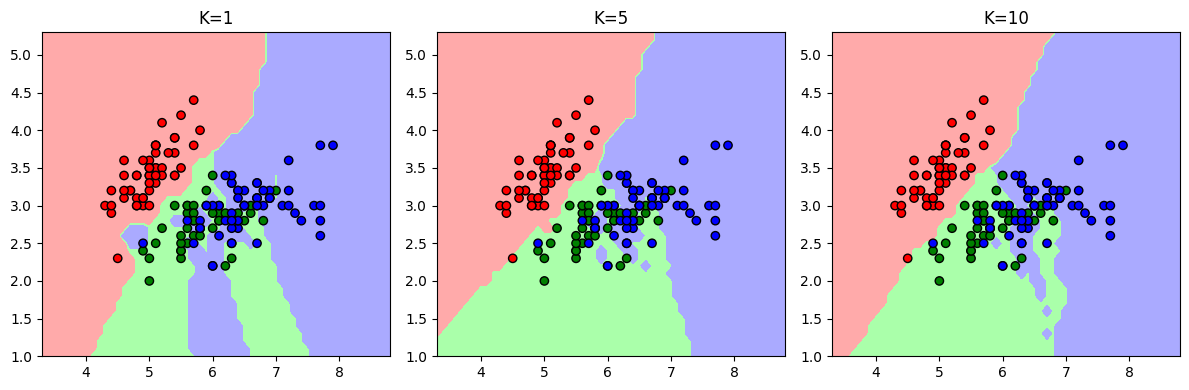

In [19]:
# Q24: Train a KNN Classifier with different values of K and visualize decision boundaries (2D for simplicity).
from matplotlib.colors import ListedColormap

X, y = load_iris(return_X_y=True)
X = X[:, :2]  # only use first 2 features for visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure(figsize=(12, 4))
for i, k in enumerate([1, 5, 10]):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 3, i+1)
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
    plt.title(f"K={k}")
plt.tight_layout()
plt.show()

In [20]:
# Q25: Apply Feature Scaling before training a KNN model and compare results with unscaled data.
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn_unscaled = KNeighborsClassifier()
knn_unscaled.fit(X_train, y_train)
unscaled_acc = accuracy_score(y_test, knn_unscaled.predict(X_test))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
scaled_acc = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))

print("Q25 - Accuracy without Scaling:", unscaled_acc)
print("Q25 - Accuracy with Scaling:", scaled_acc)

Q25 - Accuracy without Scaling: 1.0
Q25 - Accuracy with Scaling: 1.0


In [21]:
# Q26: Train a PCA model on synthetic data and print the explained variance ratio for each component.
X, _ = make_classification(n_samples=300, n_features=5, random_state=42)
pca = PCA()
pca.fit(X)
print("Q26 - Explained Variance Ratio:", pca.explained_variance_ratio_)

Q26 - Explained Variance Ratio: [0.59419682 0.25134238 0.1544608  0.         0.        ]


In [22]:
# Q27: Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc_without_pca = accuracy_score(y_test, knn.predict(X_test))

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_train_pca, y_train)
acc_with_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("Q27 - Accuracy without PCA:", acc_without_pca)
print("Q27 - Accuracy with PCA:", acc_with_pca)


Q27 - Accuracy without PCA: 1.0
Q27 - Accuracy with PCA: 1.0


In [23]:
# Q28: Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Q28 - Best Parameters:", grid.best_params_)
print("Q28 - Best Accuracy:", grid.best_score_)

Q28 - Best Parameters: {'n_neighbors': 3}
Q28 - Best Accuracy: 0.9462450592885375


In [24]:
# Q29: Train a KNN Classifier and check the number of misclassified samples.
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
misclassified = np.sum(y_pred != y_test)
print("Q29 - Misclassified Samples:", misclassified)


Q29 - Misclassified Samples: 0


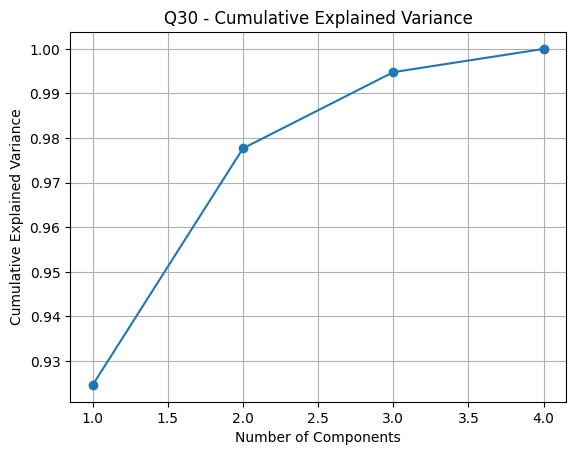

In [25]:
# Q30: Train a PCA model and visualize the cumulative explained variance.
pca = PCA().fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Q30 - Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [27]:
# Synthetic data
X_class, y_class = make_classification(n_samples=300, n_features=5, n_informative=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [28]:
# Q31: Train KNN Classifier with different weights
knn_uniform = KNeighborsClassifier(weights='uniform')
knn_distance = KNeighborsClassifier(weights='distance')
knn_uniform.fit(X_train, y_train)
knn_distance.fit(X_train, y_train)
print("Q31 - Uniform Accuracy:", accuracy_score(y_test, knn_uniform.predict(X_test)))
print("Q31 - Distance Accuracy:", accuracy_score(y_test, knn_distance.predict(X_test)))

Q31 - Uniform Accuracy: 0.8666666666666667
Q31 - Distance Accuracy: 0.8666666666666667


In [29]:
# Q32: KNN Regressor with different k
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=300, n_features=5, noise=0.3, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
for k in [3, 5, 10]:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_r, y_train_r)
    print(f"Q32 - MSE for k={k}:", mean_squared_error(y_test_r, knn_reg.predict(X_test_r)))

Q32 - MSE for k=3: 987.5204405993592
Q32 - MSE for k=5: 937.6713205301679
Q32 - MSE for k=10: 1007.1121696434961


In [31]:
from sklearn.impute import KNNImputer
# Q33: KNN Imputation
X_missing = X_class.copy()
X_missing[::10] = np.nan
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_missing)
print("Q33 - Imputed Sample Row:", X_imputed[0])

Q33 - Imputed Sample Row: [-0.41950466 -0.46310815  0.10446159  0.64981394  0.54635586]


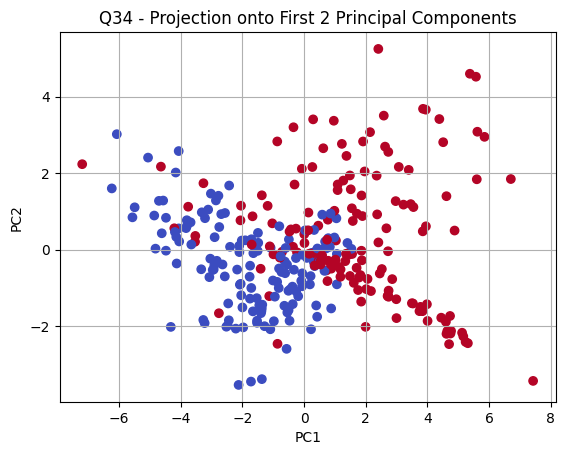

In [32]:

# Q34: PCA Projection Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_class)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_class, cmap='coolwarm')
plt.title("Q34 - Projection onto First 2 Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [33]:

# Q35: KD Tree vs Ball Tree
kd_tree = KNeighborsClassifier(algorithm='kd_tree')
ball_tree = KNeighborsClassifier(algorithm='ball_tree')
kd_tree.fit(X_train, y_train)
ball_tree.fit(X_train, y_train)
print("Q35 - KD Tree Accuracy:", accuracy_score(y_test, kd_tree.predict(X_test)))
print("Q35 - Ball Tree Accuracy:", accuracy_score(y_test, ball_tree.predict(X_test)))

Q35 - KD Tree Accuracy: 0.8666666666666667
Q35 - Ball Tree Accuracy: 0.8666666666666667


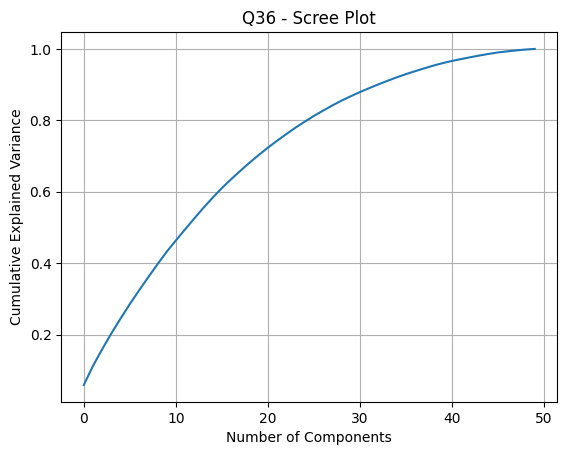

In [34]:
# Q36: Scree Plot (High-dimensional PCA)
X_high = np.random.rand(100, 50)
pca = PCA()
pca.fit(X_high)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Q36 - Scree Plot')
plt.grid(True)
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score


In [37]:
# Q37: KNN Classifier Precision, Recall, F1
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Q37 - Precision:", precision_score(y_test, y_pred))
print("Q37 - Recall:", recall_score(y_test, y_pred))
print("Q37 - F1 Score:", f1_score(y_test, y_pred))

Q37 - Precision: 0.9285714285714286
Q37 - Recall: 0.8125
Q37 - F1 Score: 0.8666666666666667


In [38]:
# Q38: PCA with different components and accuracy
for n in [2, 3, 5]:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_class)
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y_class, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(X_train_p, y_train_p)
    acc = accuracy_score(y_test_p, knn.predict(X_test_p))
    print(f"Q38 - Accuracy with {n} PCA components:", acc)

Q38 - Accuracy with 2 PCA components: 0.9
Q38 - Accuracy with 3 PCA components: 0.8666666666666667
Q38 - Accuracy with 5 PCA components: 0.8666666666666667


In [39]:
# Q39: KNN Classifier with different leaf_size
for leaf in [10, 30, 50]:
    knn = KNeighborsClassifier(leaf_size=leaf)
    knn.fit(X_train, y_train)
    print(f"Q39 - Accuracy with leaf_size={leaf}:", accuracy_score(y_test, knn.predict(X_test)))

Q39 - Accuracy with leaf_size=10: 0.8666666666666667
Q39 - Accuracy with leaf_size=30: 0.8666666666666667
Q39 - Accuracy with leaf_size=50: 0.8666666666666667


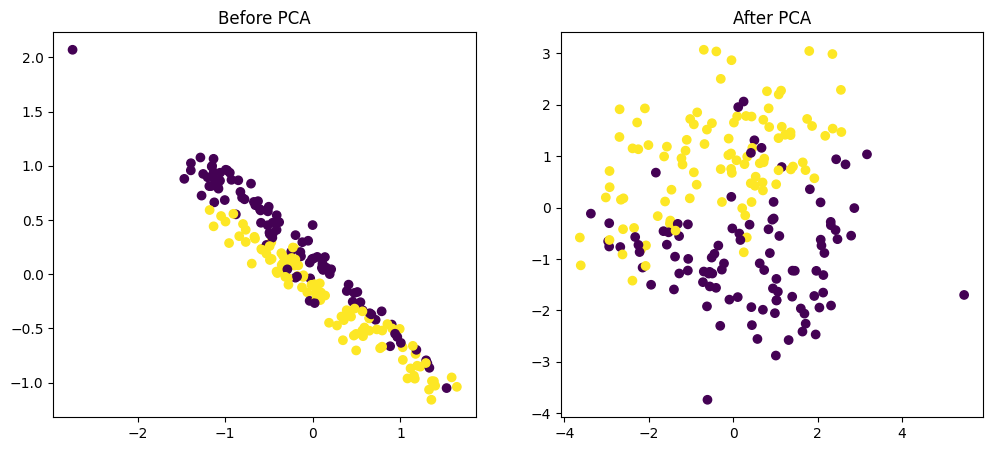

In [40]:
# Q40. Train a PCA model and visualize how data points are transformed before and after PCA.
X, y = make_classification(n_samples=200, n_features=5, random_state=42)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Before PCA")
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("After PCA")
plt.show()

In [43]:
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

# Q41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.
data = load_wine()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Q41 - Classification Report:\n", classification_report(y_test, y_pred))

Q41 - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.72      0.72      0.72        18
           2       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



In [44]:

# Q42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.
X, y = make_regression(n_samples=200, n_features=5, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(metric=metric)
    knn.fit(X_train, y_train)
    mse = mean_squared_error(y_test, knn.predict(X_test))
    print(f"Q42 - MSE using {metric}: {mse:.2f}")

Q42 - MSE using euclidean: 1438.96
Q42 - MSE using manhattan: 1364.44


In [46]:
from sklearn.metrics import roc_auc_score
# Q43. Train a KNN Classifier and evaluate using ROC-AUC score.
X, y = make_classification(n_samples=300, n_features=5, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
probs = knn.predict_proba(X_test)[:, 1]
print("Q43 - ROC AUC Score:", roc_auc_score(y_test, probs))

Q43 - ROC AUC Score: 0.9992784992784993


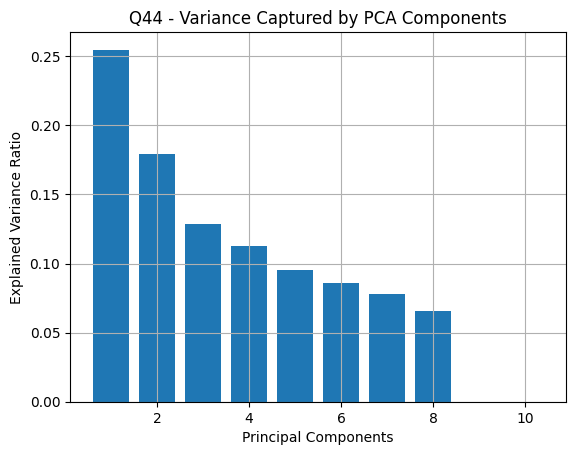

In [47]:
# Q44. Train a PCA model and visualize the variance captured by each principal component.
X, _ = make_classification(n_samples=200, n_features=10, random_state=42)
pca = PCA()
pca.fit(X)
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Q44 - Variance Captured by PCA Components")
plt.grid(True)
plt.show()

In [50]:
from sklearn.feature_selection import SelectKBest, f_classif
# Q45. Train a KNN Classifier and perform feature selection before training.
X, y = make_classification(n_samples=200, n_features=10, n_informative=5, random_state=42)
X_new = SelectKBest(score_func=f_classif, k=5).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Q45 - Accuracy after Feature Selection:", knn.score(X_test, y_test))

Q45 - Accuracy after Feature Selection: 0.86


In [51]:
# Q46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.
X, _ = make_classification(n_samples=200, n_features=10, random_state=42)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)
mse = np.mean((X - X_reconstructed) ** 2)
print("Q46 - Reconstruction MSE:", mse)

Q46 - Reconstruction MSE: 0.24140079028835001


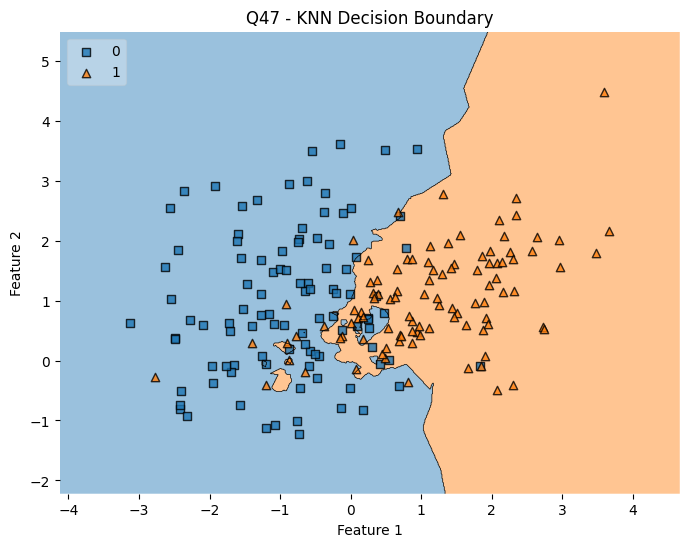

In [52]:
# Q47. Train a KNN Classifier and visualize the decision boundary.
from mlxtend.plotting import plot_decision_regions
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X, y)
plt.figure(figsize=(8,6))
plot_decision_regions(X, y, clf=knn, legend=2)
plt.title("Q47 - KNN Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

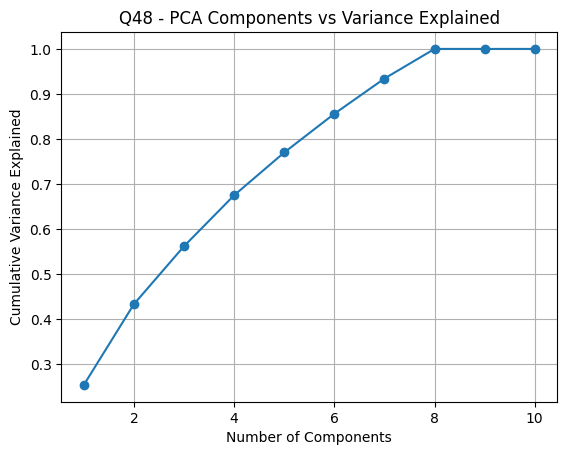

In [53]:
# Q48. Train a PCA model and analyze the effect of different numbers of components on data variance.
X, _ = make_classification(n_samples=200, n_features=10, random_state=42)
variances = []
for n in range(1, 11):
    pca = PCA(n_components=n)
    pca.fit(X)
    variances.append(np.sum(pca.explained_variance_ratio_))
plt.plot(range(1, 11), variances, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Q48 - PCA Components vs Variance Explained")
plt.grid(True)
plt.show()